In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cal_ellipse_area(ellipse):
    (center, axes, angle) = ellipse
    (MA, ma) = axes
    area = np.pi * MA * ma / 4
    return area


def filter_ellipse(ellipses, min_area, max_area):
    area = cal_ellipse_area(ellipses)
    return min_area < area < max_area


def ellipse_fit_quality(contour):
    ellipse = cv2.fitEllipse(contour)

    distances = []
    for point in contour:
        point = point[0]
        ellipse_center = (int(ellipse[0][0]), int(ellipse[0][1]))
        ellipse_axes = (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2))
        angle = ellipse[2]

        cos_angle = np.cos(np.radians(angle))
        sin_angle = np.sin(np.radians(angle))
        x = point[0] - ellipse_center[0]
        y = point[1] - ellipse_center[1]
        x_rot = x * cos_angle + y * sin_angle
        y_rot = -x * sin_angle + y * cos_angle

        distance = (x_rot / ellipse_axes[0]) ** 2 + (y_rot / ellipse_axes[1]) ** 2
        distances.append(distance)

    mse = np.mean(distances)

    return mse

In [3]:
image_path = '/mnt/data2T/junyuan/eye-tracking/outputs/EventsFrames/user1_left_session_2_0_1/000200.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
min_area, max_area = 500, 2000
best_ellipse = None
best_fit_quality = float('inf')

for contour in contours:
    if len(contour) >= 10:  # fitEllipse需要至少5个点
        ellipse = cv2.fitEllipse(contour)
        if filter_ellipse(ellipse, min_area, max_area):
            fit_quality = ellipse_fit_quality(contour)
            if fit_quality < best_fit_quality:
                best_fit_quality = fit_quality
                best_ellipse = ellipse

print(f'Best area: {cal_ellipse_area(best_ellipse)}')
cv2.ellipse(image, best_ellipse, (0, 255, 0), 2)


# print(f'最佳拟合度: {best_fit_quality}')
# cv2.ellipse(image, best_ellipse, (0, 255, 0), 2)

TypeError: cannot unpack non-iterable NoneType object

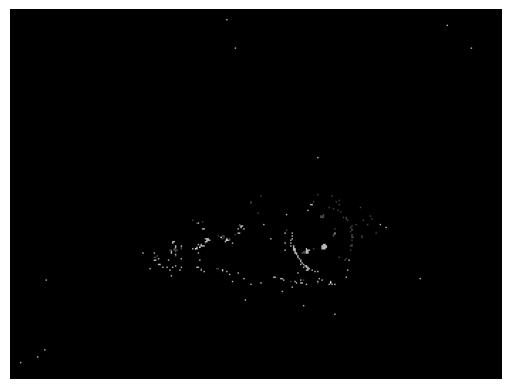

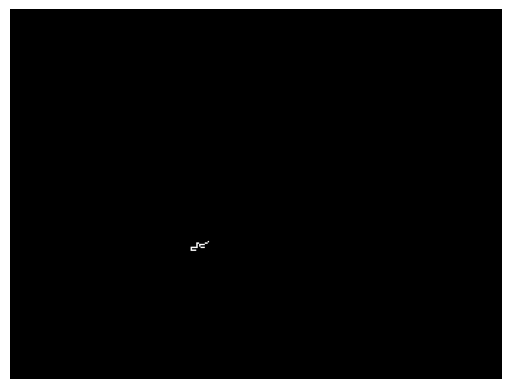

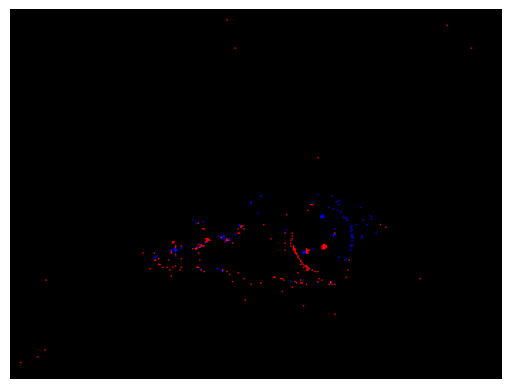

In [5]:
# 显示灰度图像
plt.imshow(gray, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

# 显示边缘检测结果
plt.imshow(edges, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

# 显示绘制了椭圆的原始图像
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标轴
plt.show()